# Notebook 1 - Explorando o GSM *Gemynocystis* sp. GBB08 criado com CarveMe 

In [1]:
import cobra

## 1. Carregando modelo 

In [4]:
model = cobra.io.read_sbml_model('/mnt/d/Document/Mestrado/Dissertação/Resultados/1_Reconstrução_Metabólica/1_carveme/models/iGbb08.xml')


Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


## 2. Inspecionando o modelo 

In [5]:
model

Name,iGbb08
Memory address,0x07fe2b6639c70
Number of metabolites,1127
Number of reactions,1509
Number of groups,0
Objective expression,1.0*Growth - 1.0*Growth_reverse_699ae
Compartments,"cytosol, periplasm, extracellular space, thylakoid"


In [4]:
model_list = [model]
for model in model_list:
    num_reactions = len(model.reactions)
    num_metabolites = len(model.metabolites)
    num_genes = len(model.genes)

    print("Model information")
    print("Model ID is: {}".format(model.id))
    print("Number of reactions: {}".format(num_reactions))
    print("Number of metabolites: {}".format(num_metabolites))
    print("Number of genes: {}".format(num_genes))
    print("Model compartments:")
    for k, v in model.compartments.items():
        print(k + '\t' + v)
    print('\n################################\n')

Model information
Model ID is: iGbb08
Number of reactions: 1509
Number of metabolites: 1127
Number of genes: 758
Model compartments:
C_c	cytosol
C_p	periplasm
C_e	extracellular space
C_u	thylakoid

################################



## Inspecionando a Função Objetivo (FBA) e os Fluxos de Troca (FVA)(Inspecting objective and exchange fluxes)

# 3. Inspecionando FBA

As inspeções serão para os três metabólitos de interesse e primeiramente serão realizadas apenas a mudança da função objetivo.
Contudo, deve-se avaliar se há formação de biomassa! 

In [6]:
# Quais são os metabólitos que estão retornando para mim?
## Uptake - o que a simulação consegue captar do meio 
## Secretion - Simula o que a célula iria exportar!

model.summary() #mmol/gDW/h



Metabolite,Reaction,Flux,C-Number,C-Flux
ca2_e,EX_ca2_e,0.0001104,0,0.00%
cit_e,EX_cit_e,0.0003311,6,0.22%
cl_e,EX_cl_e,0.0001104,0,0.00%
co2_e,EX_co2_e,0.9028,1,99.78%
cobalt2_e,EX_cobalt2_e,2.121E-06,0,0.00%
cu2_e,EX_cu2_e,1.503E-05,0,0.00%
fe2_e,EX_fe2_e,0.0001424,0,0.00%
fe3_e,EX_fe3_e,0.0001656,0,0.00%
h2o_e,EX_h2o_e,0.3049,0,0.00%
k_e,EX_k_e,0.004139,0,0.00%


In [7]:
solution = model.optimize()
print(solution)


<Solution 0.022 at 0x7fe2b52c6280>


In [8]:
model.medium

{'EX_h2o_e': 10.0,
 'EX_hco3_e': 10.0,
 'EX_cl_e': 10.0,
 'EX_pi_e': 10.0,
 'EX_nh4_e': 10.0,
 'EX_fe3_e': 10.0,
 'EX_k_e': 10.0,
 'EX_ca2_e': 10.0,
 'EX_cit_e': 10.0,
 'EX_mg2_e': 10.0,
 'EX_mn2_e': 10.0,
 'EX_cobalt2_e': 10.0,
 'EX_zn2_e': 10.0,
 'EX_co2_e': 10.0,
 'EX_o2_e': 10.0,
 'EX_fe2_e': 10.0,
 'EX_mobd_e': 10.0,
 'EX_no3_e': 10.0,
 'EX_photon_e': 10.0,
 'EX_so4_e': 10.0,
 'EX_cu2_e': 10.0}

### Principais reações de consumo e produção de energia

In [8]:
model.metabolites.atp_c.summary()

Percent,Flux,Reaction,Definition
22.67%,0.9679,ATPS4rpp,adp_c + 4.0 h_p + pi_c --> atp_c + h2o_c + 3.0 h_c
75.30%,3.214,ATPSu,3.0 adp_c + 14.0 h_u + 3.0 pi_c --> 3.0 atp_c + 3.0 h2o_c + 11.0 h_c
2.00%,0.08533,PYK,adp_c + h_c + pep_c --> atp_c + pyr_c
0.03%,0.001128,URIDK2r,atp_c + dump_c <=> adp_c + dudp_c
Percent,Flux,Reaction,Definition
0.15%,-0.006272,ACGK,acglu_c + atp_c --> acg5p_c + adp_c
0.12%,-0.005223,ACS,ac_c + atp_c + coa_c --> accoa_c + amp_c + ppi_c
1.25%,-0.05318,ADK1,amp_c + atp_c <=> 2.0 adp_c
0.00%,-2.121E-06,ADNK1,adn_c + atp_c --> adp_c + amp_c + h_c
0.12%,-0.005223,ADSK,aps_c + atp_c --> adp_c + h_c + paps_c


In [ ]:
## Teste de Reação de Biomassa


In [10]:
model.reactions.Growth.summary()

## Retorno do FBA padrão (Repetição Linear)


In [ ]:
###################

In [9]:
solutions = {}
objectives = ['Growth','DMATT', 'GRTT', 'DPPS' ]

for objective in objectives:
    with model:
        model.objective = objective
        print('Dentro do with')
        print(model.objective.expression)
        solution = model.optimize()
        solutions[objective] = solution.objective_value
    print('Fora do with')
    print(model.objective.expression)

Dentro do with
1.0*Growth - 1.0*Growth_reverse_699ae
Fora do with
1.0*Growth - 1.0*Growth_reverse_699ae
Dentro do with
1.0*DMATT - 1.0*DMATT_reverse_3a731
Fora do with
1.0*Growth - 1.0*Growth_reverse_699ae
Dentro do with
1.0*GRTT - 1.0*GRTT_reverse_f3afe
Fora do with
1.0*Growth - 1.0*Growth_reverse_699ae
Dentro do with
1.0*DPPS - 1.0*DPPS_reverse_d6ed6
Fora do with
1.0*Growth - 1.0*Growth_reverse_699ae


In [10]:
solutions

{'Growth': 0.02189715598358892,
 'DMATT': 0.019320843091334593,
 'GRTT': 0.019320843091334593,
 'DPPS': 0.011138446767975122}

In [23]:
model.objective.expression

1.0*Growth - 1.0*Growth_reverse_699ae

In [11]:
biomass_rxn = model.reactions.get_by_id("Growth")

In [12]:
from cobra.util.solver import linear_reaction_coefficients
linear_reaction_coefficients(model)

{<Reaction Growth at 0x7fe2b5939a90>: 1.0}

In [13]:
print (model.objective)

Maximize
1.0*Growth - 1.0*Growth_reverse_699ae


In [14]:
model.reactions.Growth.id

'Growth'

In [15]:
# change the objective to 'Growth' ###QUANDO FOR PARA REVERTER PARA ANALISAR AS OUTRAS REAÇÕES DE TERPENÓIDES
model.objective = "Growth"

# The upper bound should be 1000, so that we get
# the actual optimal value
model.reactions.get_by_id("Growth").upper_bound = 1000.
linear_reaction_coefficients(model)

{<Reaction Growth at 0x7fe2b5939a90>: 1.0}

In [ ]:
###################

## FBA (Mudanças na Função Objetivo)


### 3.1 Geranyl Diphosphate (grdp_c)

In [ ]:
model.metabolites.grdp_c.name

In [ ]:
model.metabolites.grdp_c.summary() ## Metabólito Antes da Alteração da Função Objetivo

In [ ]:
model.reactions.DMATT ## Reação para nova função Objetivo

In [ ]:
model.reactions.DMATT.id

In [ ]:
# change the objective to DMATT
model.objective = 'DMATT'

# The upper bound should be 1000, so that we get
# the actual optimal value
model.reactions.get_by_id('DMATT').upper_bound = 1000.
model.optimize().objective_value ## FBA

In [ ]:
print(model.objective)


In [ ]:
model.metabolites.grdp_c.summary() ## Metabólito DEPOIS da Alteração da Função Objetivo

### 3.2 Farnesil diphosphate ()

In [ ]:
model.metabolites.frdp_c ## Metabólito antes da Alteração da Função Objetivo

In [ ]:
model.metabolites.frdp_c.summary()

In [ ]:
model.reactions.GRTT

In [ ]:
# change the objective to 'GRTT'
model.objective = 'GRTT'

# The upper bound should be 1000, so that we get
# the actual optimal value
model.reactions.get_by_id('GRTT').upper_bound = 1000.
model.optimize().objective_value

In [ ]:
model.metabolites.frdp_c.summary() ## Metabólito APÓS da Alteração da Função Objetivo

In [ ]:
model.optimize().objective_value

In [ ]:
print (model.objective)

### 3.3 All trans Decaprenyl diphosphate ()

In [ ]:
#código

In [ ]:
model.metabolites.decdp_c.summary() ## Metabólito antes da Alteração da Função Objetivo

In [ ]:
model.optimize().objective_value

In [ ]:
# Mudando o objetivo para 'DPPS'
model.objective = 'DPPS'

# The upper bound should be 1000, so that we get
# the actual optimal value
model.reactions.get_by_id('DPPS').upper_bound = 1000.
model.optimize().objective_value

In [ ]:
model.metabolites.decdp_c.summary() ## Metabólito APÓS da Alteração da Função Objetivo

## 4. Inspecionando o pFBA

### Correndo o pFBA

In [33]:
model.objective = 'Growth'
fba_solution = model.optimize()
pfba_solution = cobra.flux_analysis.pfba(model)

In [34]:
abs(fba_solution.fluxes["Growth"] - pfba_solution.fluxes[
    "Growth"])

6.938893903907228e-18

In [35]:
import numpy as np
np.isclose(
    fba_solution.fluxes["Growth"],
    pfba_solution.fluxes["Growth"]
)

True

In [36]:
pfba_solution.fluxes["Growth"]

0.021897155983588913

In [32]:
help(cobra.flux_analysis.pfba)

Help on function pfba in module cobra.flux_analysis.parsimonious:

pfba(model: 'Model', fraction_of_optimum: float = 1.0, objective: Union[Dict, ForwardRef('Objective'), NoneType] = None, reactions: Optional[List[ForwardRef('Reaction')]] = None) -> 'Solution'
    Perform basic pFBA (parsimonious Enzyme Usage Flux Balance Analysis).
    
    pFBA [1] adds the minimization of all fluxes the the objective of the
    model. This approach is motivated by the idea that high fluxes have a
    higher enzyme turn-over and that since producing enzymes is costly,
    the cell will try to minimize overall flux while still maximizing the
    original objective function, e.g. the growth rate.
    
    Parameters
    ----------
    model : cobra.Model
        The model to perform pFBA on.
    fraction_of_optimum : float, optional
        The fraction of optimum which must be maintained. The original
        objective reaction is constrained to be greater than maximal value
        times the `fraction

In [16]:
solution_test = cobra.flux_analysis.parsimonious.pfba(model, fraction_of_optimum=1.0, objective=None, reactions=None)
solution_test

,fluxes,reduced_costs
12DGR120tipp,0.000000,294.666667
12DGR140tipp,0.000000,-2.000000
12DGR141tipp,0.000000,-2.000000
12DGR160tipp,0.000000,-2.000000
12DGR161tipp,0.000000,-2.000000
...,...,...
AHSERL2,0.003264,-2.000000
Cuabc,0.000015,-2.000000
HSERTA,0.003264,-2.000000
THRD_L,0.006161,-2.000000


In [39]:
solution_test.fluxes["Growth"]

0.021897155983588913

In [40]:
pfba_solution.fluxes["Growth"]

0.021897155983588913

In [45]:
FVA = cobra.flux_analysis.flux_variability_analysis(model, processes = 8, loopless = True, pfba_factor = 1.1)

In [64]:
MEP_reactions = ['DXPS', 'DXPRIi', 'MEPCT', 'CDPMEK', 'MECDPS',
                'MECDPDH_syn', 'IPDPS', 'DMATT',
                'GRTT', 'DPPS', 'Growth', 'IPDPS_syn']

In [65]:
MEP_reacations_FVA = FVA.loc[MEP_reactions]
MEP_reacations_FVA

,minimum,maximum
DXPS,0.023353,0.023353
DXPRIi,0.023343,0.023343
MEPCT,0.023343,0.023343
CDPMEK,0.023343,0.023343
MECDPS,0.023343,0.023343
MECDPDH_syn,0.023343,0.023343
IPDPS,0.000000,0.000000
DMATT,0.002123,0.002123
GRTT,0.002123,0.002123
DPPS,0.002121,0.002121


## Criando o Histograma

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas 


In [6]:
import pandas as pd

In [7]:
pd?

In [9]:
fva_mep_df= pd.read_csv('/mnt/c/Users/igors/OneDrive/Documentos/tabela.csv')

In [11]:
fva_mep_df.head()


,Unnamed: 0,minimum,maximum
0,DXPS,0.023353,0.023353
1,DXPRIi,0.023343,0.023343
2,MEPCT,0.023343,0.023343
3,CDPMEK,0.023343,0.023343
4,MECDPS,0.023343,0.023343


In [12]:
fva_mep_df.tail()

,Unnamed: 0,minimum,maximum
7,DMATT,0.002123,0.002123
8,GRTT,0.002123,0.002123
9,DPPS,0.002121,0.002121
10,Growth,0.021897,0.021897
11,IPDPS_syn,0.000000,0.021220


In [14]:
fva_mep_df.index

RangeIndex(start=0, stop=12, step=1)

In [17]:
fva_mep_df.columns.values

array(['Unnamed: 0', 'minimum', 'maximum'], dtype=object)

In [18]:
fva_mep_df.columns

Index(['Unnamed: 0', 'minimum', 'maximum'], dtype='object')

In [20]:
fva_mep_df.describe()

,minimum,maximum
count,12.000000,12.000000
mean,0.014028,0.015796
std,0.011288,0.010527
min,0.000000,0.000000
25%,0.002122,0.002123
50%,0.022620,0.022620
75%,0.023343,0.023343
max,0.023353,0.023353


In [21]:
fva_mep_df.T

,0,1,2,3,4,5,6,7,8,9,10,11
Unnamed: 0,DXPS,DXPRIi,MEPCT,CDPMEK,MECDPS,MECDPDH_syn,IPDPS,DMATT,GRTT,DPPS,Growth,IPDPS_syn
minimum,0.023353,0.023343,0.023343,0.023343,0.023343,0.023343,0.0,0.002123,0.002123,0.002121,0.021897,0.0
maximum,0.023353,0.023343,0.023343,0.023343,0.023343,0.023343,0.0,0.002123,0.002123,0.002121,0.021897,0.02122


In [28]:
fva_mep_df[:5]

,Unnamed: 0,minimum,maximum
0,DXPS,0.023353,0.023353
1,DXPRIi,0.023343,0.023343
2,MEPCT,0.023343,0.023343
3,CDPMEK,0.023343,0.023343
4,MECDPS,0.023343,0.023343


In [33]:
fva_df = fva_mep_df.T

In [34]:
fva_df

,0,1,2,3,4,5,6,7,8,9,10,11
Unnamed: 0,DXPS,DXPRIi,MEPCT,CDPMEK,MECDPS,MECDPDH_syn,IPDPS,DMATT,GRTT,DPPS,Growth,IPDPS_syn
minimum,0.023353,0.023343,0.023343,0.023343,0.023343,0.023343,0.0,0.002123,0.002123,0.002121,0.021897,0.0
maximum,0.023353,0.023343,0.023343,0.023343,0.023343,0.023343,0.0,0.002123,0.002123,0.002121,0.021897,0.02122


In [36]:
fva_df.columns = ['DXPS','DXPRI','MEPCT','CDPMEK','MECDPS','MECDPDH_syn','IPDPS','DMATT','GRTT','DPPS','Growth','IPDPS_syn']

In [37]:
fva_df

,DXPS,DXPRI,MEPCT,CDPMEK,MECDPS,MECDPDH_syn,IPDPS,DMATT,GRTT,DPPS,Growth,IPDPS_syn
Unnamed: 0,DXPS,DXPRIi,MEPCT,CDPMEK,MECDPS,MECDPDH_syn,IPDPS,DMATT,GRTT,DPPS,Growth,IPDPS_syn
minimum,0.023353,0.023343,0.023343,0.023343,0.023343,0.023343,0.0,0.002123,0.002123,0.002121,0.021897,0.0
maximum,0.023353,0.023343,0.023343,0.023343,0.023343,0.023343,0.0,0.002123,0.002123,0.002121,0.021897,0.02122


In [38]:
fva_df['DXPS']

Unnamed: 0        DXPS
minimum       0.023353
maximum       0.023353
Name: DXPS, dtype: object

<AxesSubplot:ylabel='Frequency'>

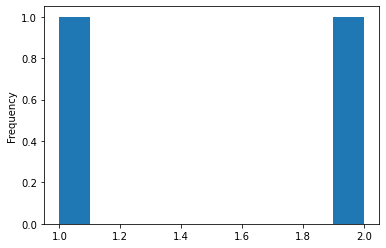

In [54]:
fva_df['DXPS'].value_counts().plot(kind='hist')

In [58]:
help(model.metabolites.h2mb4p_c.summary)

Help on method summary in module cobra.core.metabolite:

summary(solution: Optional[ForwardRef('Solution')] = None, fva: Union[float, ForwardRef('DataFrame'), NoneType] = None) -> 'MetaboliteSummary' method of cobra.core.metabolite.Metabolite instance
    Create a summary of the producing and consuming fluxes.
    
    Parameters
    ----------
    solution : cobra.Solution, optional
        A previous model solution to use for generating the summary. If
        ``None``, the summary method will generate a parsimonious flux
        distribution (default None).
    fva : pandas.DataFrame or float, optional
        Whether or not to include flux variability analysis in the output.
        If given, `fva` should either be a previous FVA solution matching the
        model or a float between 0 and 1 representing the fraction of the
        optimum objective to be searched (default None).
    
    Returns
    -------
    cobra.summary.MetaboliteSummary
    
    See Also
    --------
    Rea

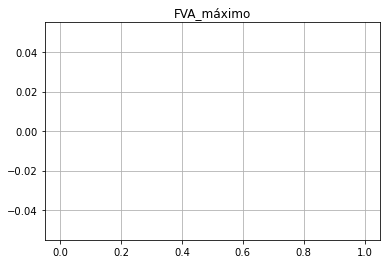

In [67]:
df = pd.DataFrame({
    'FVA_máximo': {0.023353:0.023353, 0.023343:0.023343, 0.023343:0.023343, 0.023343:0.023343, 0.023343:0.023343, 0.023343:0.023343, 0.000000:0.000000, 0.002123:0.002123, 0.002123:0.002123, 0.002121:0.002121, 0.021897:0.021897, 0.000000:0.021220}
}, index=['DXPS','DXPRI','MEPCT','CDPMEK','MECDPS','MECDPDH_syn','IPDPS','DMATT','GRTT','DPPS','Growth','IPDPS_syn'])
hist = df.hist(bins=3)

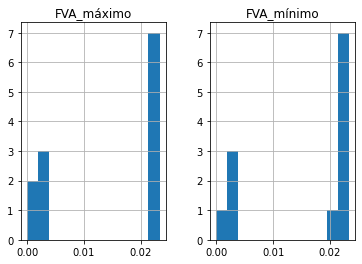

In [70]:
df = pd.DataFrame({
    'FVA_máximo': [0.023353, 0.023343, 0.023343, 0.023343, 0.023343, 0.023343, 0.0, 0.002123, 0.002123, 0.002121,0.021897, 0.0],
    'FVA_mínimo': [0.023353, 0.023343, 0.023343, 0.023343, 0.023343, 0.023343, 0.0, 0.002123, 0.002123, 0.002121, 0.021897, 0.02122]
    }, index=['DXPS','DXPRI','MEPCT','CDPMEK','MECDPS','MECDPDH_syn','IPDPS','DMATT','GRTT','DPPS','Growth','IPDPS_syn'])
hist = df.hist(bins=12)

In [35]:
fva_df['DXPS']

KeyError: 'DXPS'

In [60]:
FVA_h2mb4p_c = model.metabolites.h2mb4p_c.summary(fva = 1.0)

In [61]:
FVA_h2mb4p_c

Percent,Flux,Range,Reaction,Definition
100.00%,0.02334,[0.02334; 0.02334],MECDPDH_syn,2mecdp_c + nadph_c --> h2mb4p_c + h2o_c + nadp_c
Percent,Flux,Range,Reaction,Definition
0.00%,0,[-0.02334; 0],DMPPS,h2mb4p_c + h_c + nadh_c --> dmpp_c + h2o_c + nad_c
9.09%,-0.002123,[-0.02334; 0],DMPPS_syn,h2mb4p_c + h_c + nadph_c --> dmpp_c + h2o_c + nadp_c
0.00%,0,[-0.02334; 0],IPDPS,h2mb4p_c + h_c + nadh_c --> h2o_c + ipdp_c + nad_c
90.91%,-0.02122,[-0.02334; 0],IPDPS_syn,h2mb4p_c + h_c + nadph_c --> h2o_c + ipdp_c + nadp_c


In [62]:
model.reactions.get_by_id('IPDPS_syn')

Reaction identifier,IPDPS_syn
Name,1-hydroxy-2-methyl-2-(E)-butenyl 4-diphosphate reductase (ipdp)
Memory address,0x7f49a43308e0
Stoichiometry,h2mb4p_c + h_c + nadph_c --> h2o_c + ipdp_c + nadp_c 1-hydroxy-2-methyl-2-(E)-butenyl 4-diphosphate + H+ + Nicotinamide adenine dinucleotide phosphate - reduced --> H2O + Isopentenyl diphosphate + Nicotinamide adenine dinucleotide phosphate
GPR,MBL1211553_1
Lower bound,0.0
Upper bound,1000.0


In [63]:
model.reactions.get_by_id('IPDPS')

Reaction identifier,IPDPS
Name,1-hydroxy-2-methyl-2-(E)-butenyl 4-diphosphate reductase (ipdp)
Memory address,0x7f49a43305e0
Stoichiometry,h2mb4p_c + h_c + nadh_c --> h2o_c + ipdp_c + nad_c 1-hydroxy-2-methyl-2-(E)-butenyl 4-diphosphate + H+ + Nicotinamide adenine dinucleotide - reduced --> H2O + Isopentenyl diphosphate + Nicotinamide adenine dinucleotide
GPR,MBL1208310_1
Lower bound,0.0
Upper bound,1000.0


In [ ]:
### DMATT pFBA

In [ ]:
##### Alterando a função Objetivo para o DMATT

In [ ]:
model.objective = 'DMATT'
fba_solution = model.optimize()
pfba_solution = cobra.flux_analysis.pfba(model)

In [ ]:
abs(fba_solution.fluxes["DMATT"] - pfba_solution.fluxes[
    "DMATT"])

In [ ]:
import numpy as np
np.isclose(
    fba_solution.fluxes["Growth"],
    pfba_solution.fluxes["Growth"]
)

In [ ]:
pfba_solution.fluxes["DMATT"]

In [ ]:
print (model.objective)

In [ ]:
pfba_solution.fluxes["Growth"] ## Obs.: Com a mudança da Função Objetivo para o DMATT, o fluxo de Biomassa assumiu esse valor! 

In [ ]:
#####

In [ ]:
### GRTT pFBA

In [ ]:
print(model.objective)

In [ ]:
# Mudando o objetivo para 'DPPS'
model.objective = 'GRTT'

# The upper bound should be 1000, so that we get
# the actual optimal value
model.reactions.get_by_id('GRTT').upper_bound = 1000.
model.optimize().objective_value

In [ ]:
print(model.objective)

In [ ]:
model.objective = 'GRTT'
fba_solution = model.optimize()
pfba_solution = cobra.flux_analysis.pfba(model)

In [ ]:
abs(fba_solution.fluxes["GRTT"] - pfba_solution.fluxes[
    "GRTT"])

## 4.1 pFBA para as minhas reações de Interesse


In [ ]:
cobra.flux_analysis.pfba(model, fraction_of_optimum= 1.0, objective= None, reactions= ['Growth','DMATT','GRTT', 'DPPS'])

## 4.2 FVA para as minhas reações de Interesse

In [ ]:
cobra.flux_analysis.flux_variability_analysis(model, reaction_list= ['Growth','DMATT','GRTT', 'DPPS'], loopless= False, fraction_of_optimum=1.0) ### Página 163 da Documentação

## 4.3 FVA teste para os Terpenóides


## 5. Variação do Fluxo (Variation in fluxes)

In [ ]:
from cobra.flux_analysis import flux_variability_analysis

In [ ]:
flux_variability_analysis(model, model.reactions.index['Growth','DMATT','GRTT', 'DPPS'])


In [ ]:
## Índice das Reações
model.reactions.index('Growth')

In [ ]:
model.reactions.index('DMATT')

In [ ]:
model.reactions.index('GRTT')

In [ ]:
model.reactions.index('DPPS')

In [ ]:
flux_variability_analysis(model, model.reactions[1502])

In [ ]:
flux_variability_analysis(model, model.reactions[406])

In [ ]:
flux_variability_analysis(model, model.reactions[625])

In [ ]:
flux_variability_analysis(model, model.reactions[416])

In [ ]:
# Eu tenho a variação do 'mínimo' e do 'máximo' que aquele fluxo consegue assumir!
model.summary(fva=0.95)

###  FVA

### Examinando as trocas 

#### iGBBB08 

In [ ]:
exchanges = model.exchanges
print("Number of exchange components: {}".format(len(exchanges)))
print("Exchange reaction \t Lower flux")
for exchange in exchanges:
    reaction = str(exchange)
    lb = str(exchange.lower_bound)
    print(reaction + '\t' + lb)

    ## São 130 componentes de troca . Os que estão em 0.0 no 'flux' são os que o modelo não consegue absorver, ou seja, praticamente só exporta.
    ## Os que estão negativos no 'Lower' são os que estão no meio de cultivo que fazem parte da criação do modelo

### Ajuste na troca de luz (fótons) e fazer um FVA (1°Modificação)

In [ ]:
model.reactions.EX_photon_e.lower_bound = -1000.0

In [ ]:
model.summary(fva = 0.95)

### Limitando o fluxo de fótons (2°Modificação)

In [ ]:
model.reactions.EX_photon_e.lower_bound = -25.0

In [ ]:
model.summary(fva = 0.95)

## 6.Inspecionando a Visualização em Gráfico

### Carregando as Bibliotecas

In [ ]:

import escher
from escher import Builder
import cobra
from time import sleep
escher.rc['never_ask_before_quit'] = True

In [ ]:
builder = Builder(model_json='/mnt/d/Document/Mestrado/Dissertação/Resultados/1_Reconstrução_Metabólica/1_carveme/Jupyter_Notebook_iGBBB/igbb08.json')
builder